# **Smart-UJ UAQUE**
## Documento entendimiento de datos</br>
Este documento busca exponer un primer acercamiento a los datos proveídos por la biblioteca. Procederemos a presentar la carga de los datos. Información básica de los archivos recibido. Descripción de las columnas para el dataset de material bibliográfico de la biblioteca Alfonso Borrero Cabal S.J. Presentaremos gráficos que permitirán visualizar la relación entre los tipos de datos encontrados, junto a una breve descripción de las inferencias que se pueden realizar sobre estos. Evaluaremos la calidad de los datos con respecto al formato, estandarización y volumen de datos faltantes.

Posteriormete se realizará una limpieza tanto de filas como columnas para trabajar solo con los datos necesarios para los algoritmos de agrupamiento y recomendación.


**Integrantes:**</br>
Johan Ortegón </br>
Juan Angarita </br>
Jorge Salgado </br>
Daniel Tibaquira </br></br>
**Directora de Proyecto de Grado:** </br>
Viky Arias </br>

# Carga de datos

Comenzamos importando la librerias necesarias para cargar los datos y hacer su respectiva exploración.<br/>

* Pandas: Permite almacenar los datos en dataframes(matrices) y operación entre las celdas.<br/>

* Plt(matplotlib.pyplot) y sns(seaborn): permiten visualizar los datos a través de diferentes gráficos. 



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import re
%matplotlib inline

Importamos el dataset y los guardamos dentro de un dataframe.<br/>
* datasetMaterial: Corresponde al material bibliográfico almacenado en la  biblioteca general. <br/>

In [4]:
path =("https://www.dropbox.com/s/96kxr4dw10q7tzl/B-GENERAL-COLECCIONES-TEMATICAS.json?dl=1")
datasetMaterial = pd.read_json(path)

Hacemos una primera visualización de los datos el archivo.

In [5]:
display(datasetMaterial.head(3))

,Signatura,Id de item,Ubicación Habitual,Ubicación Actual,Tipo de ítem,Biblioteca,Cat2,Fecha de creación,Total de préstamos,Llaves,Vol,Copias,Autor,Autor corporativo,Título,Tema 650,Año publicación,Todas las temáticas
0,925.2 C66NA|,60000000049754,A-BATEMAN,A-BATEMAN,LIBRO,B-GENERAL,DONACION,20190830,0,933604,1,1,"Álvarez Ríos, Baldomero 1924-",-,Copernico gigante del Renacimiento Baldomero A...,Astrónomos Polonia Biografías,1973.0,24$aAstronomos$zPolonia$vBiografias
1,925.2 C66NC V.3|,60000000049751,A-BATEMAN,A-BATEMAN,LIBRO,B-GENERAL,DONACION,20190830,0,933606,1,1,-,"Academia de Ciencias Médicas, Físicas y Natura...","Nicolás Copérnico, 500 aniversario, 1473-1973",Astronomía Historia,1973.0,14$aAstronomia$xHistoria24$aAstronomos$zPoloni...
2,925.2 C66NC V.1|,60000000049753,A-BATEMAN,A-BATEMAN,LIBRO,B-GENERAL,DONACION,20190830,0,933606,2,1,-,"Academia de Ciencias Médicas, Físicas y Natura...","Nicolás Copérnico, 500 aniversario, 1473-1973",Astronomía Historia,1973.0,14$aAstronomia$xHistoria24$aAstronomos$zPoloni...


# 1. Reporte de recolección de datos 
En esta sección exponemos las principales características de los archivos (Propietario, Formato original, URL, Fecha de última actualziación, Tamaño del archivo, Nombre del almacenamiento físico, restricciones de uso y Número de atributos) junto con una breve descripción.
* **Nombre conjunto de datos:** B-GENERAL-COLECCIONES-TEMATICAS
    * **Descripción:** ofrece registros de la procedencia del material, el tipo del material, el autor , etc.
    * **Propietario:** Andrés Echavarria​
    * **Formato original:** Texto Plano
    * **URL u origen:** Proporcionados para el Proyecto Smart-UJ
    * **Última actualización:** 02/08/2021
    * **Tamaño original:** 222.3MB
    * **Alamcenamiento físico:** Servidor Oracle 11G
    * **Restricciones de uso:** Solo se utilizarán los datos de la biblioteca general.
    * **Número de atributos:** 18.


# Pre-Limpieza
En esta sección elaboramos una descripción detallada de los atributos (columnas) que contienen los archivos.Así mismo se mostrarán gráficas que nos ayudarán a entender mejor la distribución de los datos. 

Comenzamos creando algunas funciones auxiliares para describir los datos y gráficarlos. 

In [6]:
def descripcion(dataset, nombre):
  nulos = len(dataset.loc[dataset[nombre].isnull()])
  print("Número de datos nulos:", nulos)
  unicos = len(dataset[nombre].unique())
  print("Número de datos únicos:", unicos)
  tipo = type(dataset[nombre][0])
  print("Tipo de dato:", tipo)
  print("Ejemplo:", dataset[nombre][0])

In [7]:
def histograma(dataset,nombre):
  plt.figure(figsize=(25, 10))
  plt.title("Frecuencia de préstamos por " + nombre)
  plt.xlabel(nombre)
  plt.ylabel("Frecuencia")
  dataset[nombre].value_counts().plot(kind='bar') 

In [8]:
def frecuencias(dataset,nombre):
  table = (dataset[nombre].value_counts(normalize = True) * 100).to_frame()
  table.columns = ['Procentaje (%)']
  table.columns.name = nombre
  display(table)

Mostramos el número de filas y columnas que componen el archivo correspondiente al material bibliográfico de la biblioteca general Alfonso Borrero Cabal.

In [9]:
print("Número de Filas: ", datasetMaterial.shape[0])
print("Número de Columnas: ", datasetMaterial.shape[1])

Número de Filas:  746934
Número de Columnas:  18


In [10]:
datasetMaterial.columns

Index(['Signatura', 'Id de item', 'Ubicación Habitual', 'Ubicación Actual',
       'Tipo de ítem', 'Biblioteca', 'Cat2', 'Fecha de creación',
       'Total de préstamos', 'Llaves', 'Vol', 'Copias', 'Autor',
       'Autor corporativo', 'Título', 'Tema 650', 'Año publicación',
       'Todas las temáticas'],
      dtype='object')

In [11]:
dataset = datasetMaterial

### Col: Signatura
**Descripción:** permite ubicar temáticamente el material bibliográfico en el Sistema de Clasificación Dewey. La primera parte del string refiere al dewey que utiliza la biblioteca. 

In [12]:
col = "Signatura"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 549198
Tipo de dato: <class 'str'>
Ejemplo: 925.2 C66NA|


**Análisis:**Signatura nos ofrece información adicional sobre la temática de los libros. Se usará esta columna posteriormente para obtener el dewey especifico de cada libro.

### Col: Id de item
**Descripción:** Id único de cada copia de ítem. Si un ítem tiene varias copias en la biblioteca, cada una de estas copias tendrá un diferente Id.

In [13]:
col = "Id de item"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 746823
Tipo de dato: <class 'str'>
Ejemplo: 60000000049754


**Análisis:**Este dato no es muy descriptivo para entender los gustos de los usuarios. Igualmente sirve para realizar join con la tabla de prestamos. 

### Col: Ubicación Habitual
**Descripción:** Ubicación del ítem al interior de la biblioteca general. 

In [14]:
col = "Ubicación Habitual"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 52
Tipo de dato: <class 'str'>
Ejemplo: A-BATEMAN


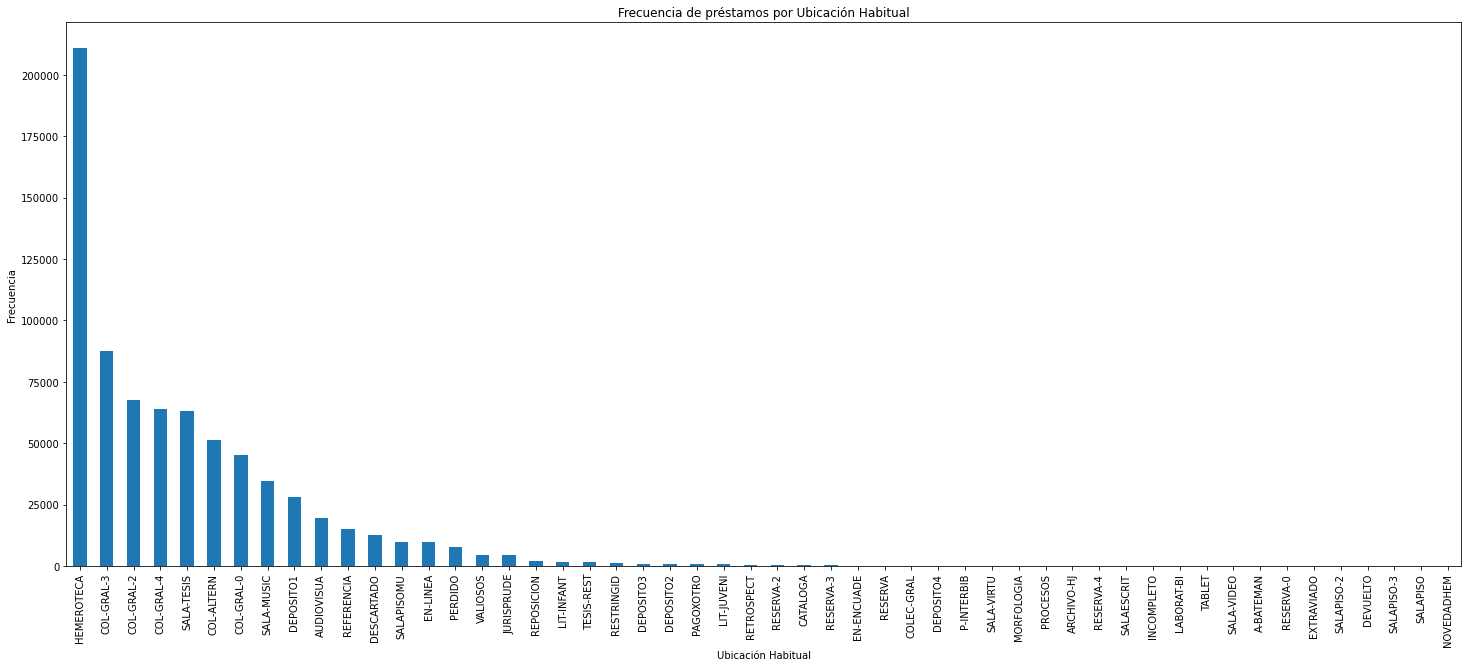

In [15]:
histograma(dataset,col)

In [16]:
frecuencias(dataset,col)

Ubicación Habitual,Procentaje (%)
HEMEROTECA,28.227795
COL-GRAL-3,11.734906
COL-GRAL-2,9.039085
COL-GRAL-4,8.564077
SALA-TESIS,8.433543
COL-ALTERN,6.856295
COL-GRAL-0,6.056492
SALA-MUSIC,4.650746
DEPOSITO1,3.752540
AUDIOVISUA,2.633700


La descripción de cada uno de los valores de este atributo se describen en la siguiente tabla: 

Categoría(nombre)   | Descripción
--------------------|------------------
Colección de Referencia| Piso 1
AUDIOVISUA| Sótano 2 (alberga videos, blu-ray, videos beta y vhs, películas).
CATALOGA| Indica que el registro está en proceso de Catalogación y aún no está disponible para préstamo
COL-ALTERN| Indica que son ítems que se enviarán a Depósito
COL-GRAL-0, COL-GRAL-1, COL-GRAL-2, COL-GRAL-3, COL-GRAL-4| Ubicaciones de las Colecciones de los pisos 0 al 4.
DEPÓSITO| Ítems que no están disponibles en la Colección
HEMEROTECA| Ubicación donde se encuentran las Revistas. Sótano 2
JURISPRUDE| Colección del área de Ciencias Jurídicas
LIT-INFANT| Literatura Infantil
LIT-JUVENI| Literatura Juvenil.
PERDIDO| Ítems reportados como perdidos.
P-INTERBIB| Significa Préstamos Interbibliotecarios. Estos ítems no hacen parte de la Biblioteca General.<br/> Son ítems solicitados a otras bibliotecas en calidad de préstamo.
REFERENCIA| Colección de Referencia Piso 1
RESERVA-2, RESERVA-3| Ítems solicitados como Reserva Académica de los piso 2 y 3.
SALA-MUSIC| Sala de Música
SALAPISOMU| Consulta en Sala de Música.
SALA-TESIS| Sala de Tesis. Sótano 2.
VALIOSOS| Colección de Libros Valiosos.

**Análisis:**La mayoría del material de la biblioteca se encuentra entre la hemeroteca y las colecciones de los pisos 0 a 4 de la bilioteca general.

### Col: Ubicación Actual
**Descripción:** Ubicación actual que tiene el ítem al interior de la biblioteca. 

In [17]:
col = "Ubicación Actual"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 66
Tipo de dato: <class 'str'>
Ejemplo: A-BATEMAN


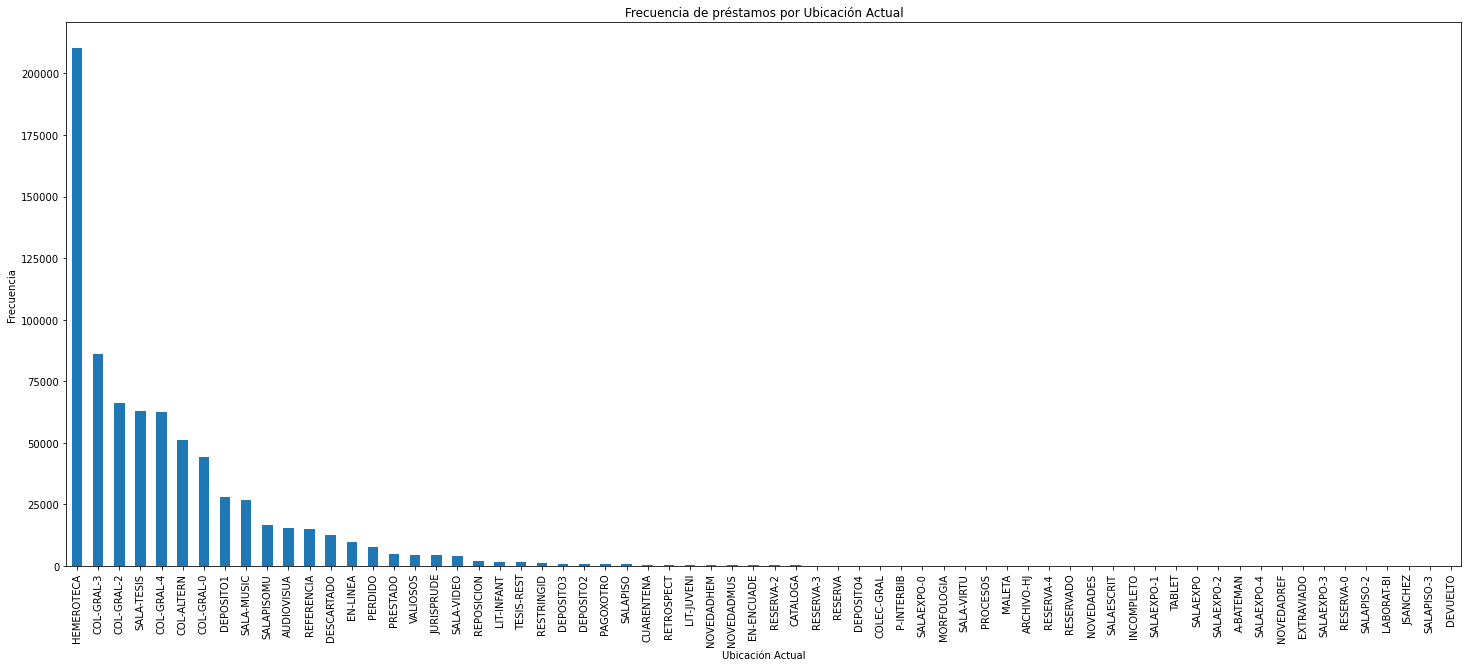

In [18]:
histograma(dataset,col)

In [19]:
frecuencias(dataset,col)

Ubicación Actual,Procentaje (%)
HEMEROTECA,28.143986
COL-GRAL-3,11.532076
COL-GRAL-2,8.845761
SALA-TESIS,8.433275
COL-GRAL-4,8.346788
...,...
SALAPISO-2,0.000268
LABORAT-BI,0.000134
JSANCHEZ,0.000134
SALAPISO-3,0.000134


**Análisis:**Este atributo cumple las mismas carácteristicas que la ubicación habitual de los ítems. 

### Col: Tipo de ítem
**Descripción:** Los material o ítems que tiene la biblioteca varian y no son todos del mismo tipo. Este atributo define que tipo de objeto es el ítem. 

In [20]:
col = "Tipo de ítem"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 28
Tipo de dato: <class 'str'>
Ejemplo: LIBRO


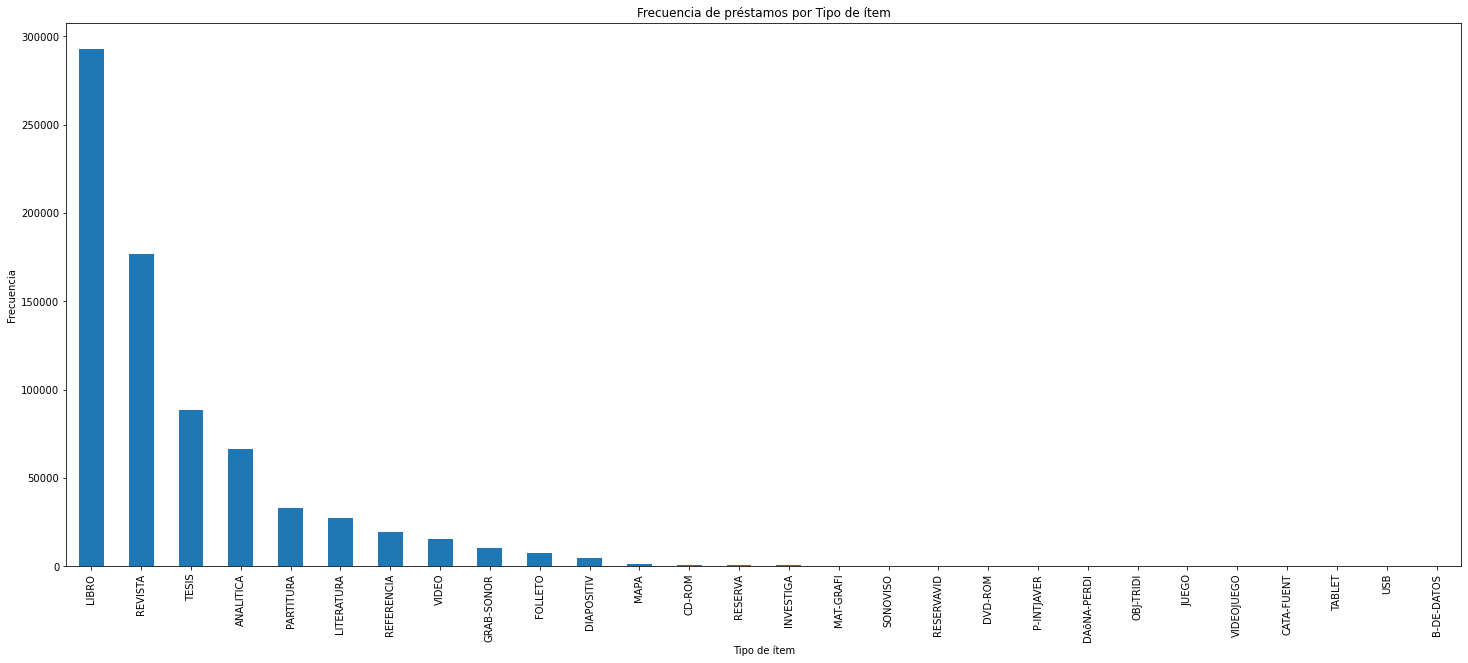

In [21]:
histograma(dataset,col)

In [22]:
frecuencias(dataset,col)


Tipo de ítem,Procentaje (%)
LIBRO,39.231445
REVISTA,23.658449
TESIS,11.874677
ANALITICA,8.881909
PARTITURA,4.393695
LITERATURA,3.690152
REFERENCIA,2.594071
VIDEO,2.059620
GRAB-SONOR,1.382184
FOLLETO,1.033291


**Análisis:**El tipo de ítem más recurrente de la biblioteca son los libros, seguidos de revistas y tesis. Posteriormente se realizará una comparativa para enteder si el material que más tiene la biblioteca así mismo es el que más se alquila.

### Col: Biblioteca
**Descripción:** A que biblioteca pertenece el ítem. Anteriormente fue filtrado para que el dataset solo tuviera atributos de la biblioteca general, por lo cual contiene un único atributo.

In [23]:
col = "Biblioteca"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 1
Tipo de dato: <class 'str'>
Ejemplo: B-GENERAL


### Col: Cat2
**Descripción:** Describe la forma de adquisición del material por parte de la biblioteca. 

In [24]:
col = "Cat2"
descripcion(dataset,col)

Número de datos nulos: 244646
Número de datos únicos: 17
Tipo de dato: <class 'str'>
Ejemplo: DONACION


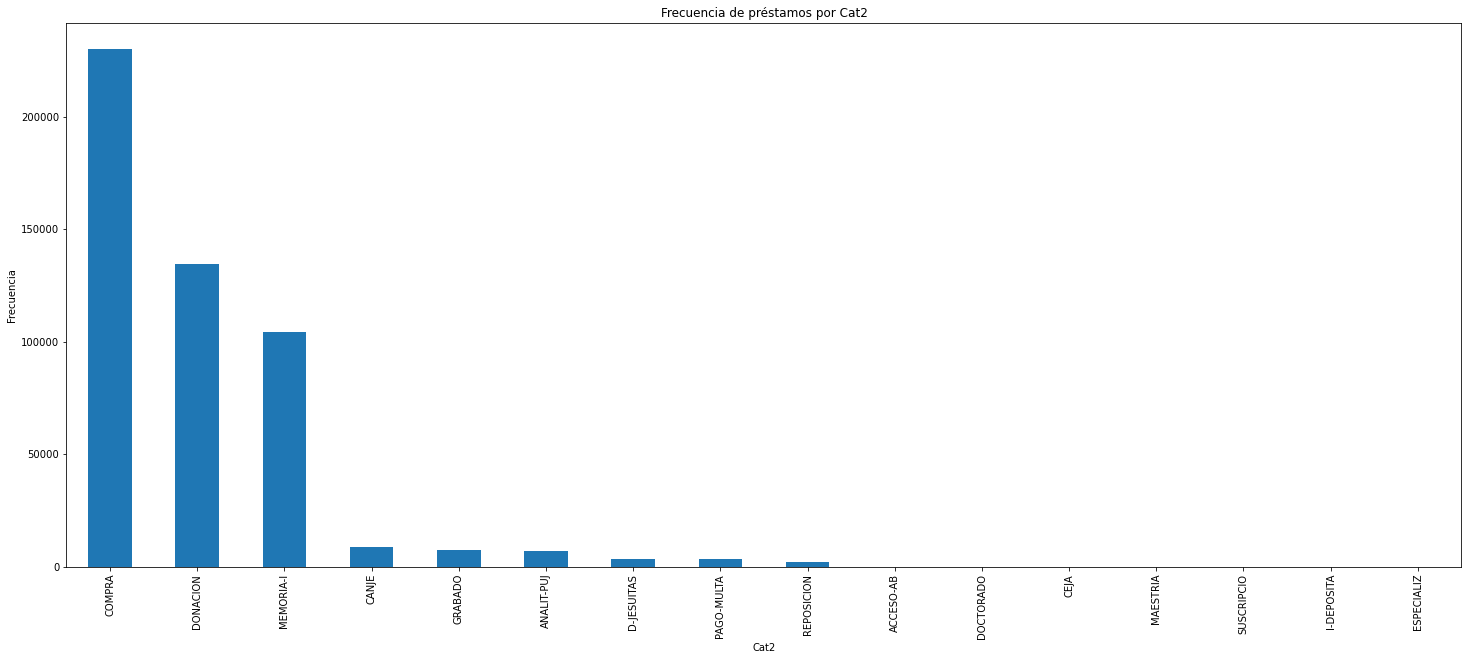

In [25]:
histograma(dataset,col)

In [26]:
frecuencias(dataset,col)


Cat2,Procentaje (%)
COMPRA,45.822715
DONACION,26.825447
MEMORIA-I,20.822317
CANJE,1.740834
GRABADO,1.494959
ANALIT-PUJ,1.442001
D-JESUITAS,0.704974
PAGO-MULTA,0.653609
REPOSICION,0.454122
ACCESO-AB,0.016524


**Análisis:** *Hemos encontrado que la procedencia de la mayoría del material corresponde a las compras realizadas por la biblioteca, el **45.82%** ha sido obtenido de esta forma aunque también es relevante la donación con el **26.82%**.*

### Col: Fecha de creación
**Descripción:** Fecha de registro del material al interior de la biblioteca. 

In [27]:
 import datetime

In [28]:
col = "Fecha de creación"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 12191
Tipo de dato: <class 'numpy.int64'>
Ejemplo: 20190830


In [29]:
dataset[col]

0         20190830
1         20190830
2         20190830
3         20190830
4         20190830
            ...   
746929    20200206
746930    20200312
746931    20200313
746932    20200313
746933    20210420
Name: Fecha de creación, Length: 746934, dtype: int64

In [30]:
fechasFormat = datasetMaterial[col].apply(lambda x: str(x))
fechasSave = fechasFormat.apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))
datasetMaterial[col] = fechasSave
datasetMaterial[col][0]

Timestamp('2019-08-30 00:00:00')

In [31]:
dataset[col].describe()

<ipython-input-31-ae8f3d10d7ab>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset[col].describe()


count                  746934
unique                  12191
top       2002-06-29 00:00:00
freq                    45126
first     1970-01-01 00:00:00
last      2021-07-28 00:00:00
Name: Fecha de creación, dtype: object

**Análisis:** Notamos que los primeros materiales que tiene la biblioteca datan de 1970 y el material más moderno del 2021. 

### Col: Total de préstamos
**Descripción:** total de préstamos que ha tenido el material. Este número no se calcula en una franja de tiempo especifico.



In [32]:
col = "Total de préstamos"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 1047
Tipo de dato: <class 'numpy.int64'>
Ejemplo: 0


In [33]:
dataset[col].describe()

count    746934.000000
mean         12.151096
std          46.285152
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max        2504.000000
Name: Total de préstamos, dtype: float64

In [34]:
dataset.sort_values(by=[col], ascending=False).head(5)

,Signatura,Id de item,Ubicación Habitual,Ubicación Actual,Tipo de ítem,Biblioteca,Cat2,Fecha de creación,Total de préstamos,Llaves,Vol,Copias,Autor,Autor corporativo,Título,Tema 650,Año publicación,Todas las temáticas
151729,611.018 G35 2000|,80000003503139,COL-GRAL-2,COL-GRAL-2,LIBRO,B-GENERAL,COMPRA,2001-08-24,2504,541892,1,2,"Geneser, Finn",-,Histología sobre bases biomoleculares Finn Gen...,Histología,2009.0,14$aHistologia24$aCelulas24$aTejidos
630603,611.018 G35 2000|,80000003232710,REPOSICION,REPOSICION,RESERVA,B-GENERAL,COMPRA,2001-11-30,2414,541892,1,3,"Geneser, Finn",-,Histología sobre bases biomoleculares Finn Gen...,Histología,2009.0,14$aHistologia24$aCelulas24$aTejidos
222796,574.192 M17|,80000003002477,COL-GRAL-3,COL-GRAL-3,LIBRO,B-GENERAL,COMPRA,1999-10-27,2141,363142,1,3,"Mathews, Christopher K. 1937-",-,Bioquímica Christopher K. Mathews and Kensal E...,Bioquímica,2001.0,24$aBioquimica24$aMetabolismo24$aProteinas
151728,611.018 G35 2000|,80000003200691,COL-GRAL-2,COL-GRAL-2,LIBRO,B-GENERAL,COMPRA,2001-08-24,2122,541892,1,1,"Geneser, Finn",-,Histología sobre bases biomoleculares Finn Gen...,Histología,2009.0,14$aHistologia24$aCelulas24$aTejidos
194907,519.2 C15|,80000001136541,COL-GRAL-3,COL-GRAL-3,LIBRO,B-GENERAL,COMPRA,1991-05-09,2052,282926,1,5,"Canavos, George C.",-,Probabilidad y estadistica aplicaciones y meto...,Estadística,1986.0,24$aEstadistica24$aProbabilidades


**Análisis:**Debido a que este número no se calcula en una franja de tiempo especifico no se realizará un análisis más a fondo de este atributo. Un mejor análisis de popularidad se puede encontrar en el notebook de entendimiento de datos de prestamos.


### Col: Llaves
**Descripción:** Las llaves desginan un id a los libros no por copia física sino por el libro en sí. Si un libro tiene varias copias, todas las copias tienen diferente ID más tendrán la misma llave. 

In [35]:
col = "Llaves"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 405416
Tipo de dato: <class 'numpy.int64'>
Ejemplo: 933604


In [36]:
llaves = len(dataset[col].unique())
ids = len(dataset["Id de item"].unique())
print("Numero ids: ", ids)
print("Numero llaves: ", llaves)
print("Relación llaves/ids: ", llaves/ids *100, "%")

Numero ids:  746823
Numero llaves:  405416
Relación llaves/ids:  54.28541970453507 %


In [37]:
datasetMaterial['Llaves'] = datasetMaterial['Llaves'].apply(lambda x: str(x))

**Análisis**: Aunque hay más de 700 mil ítems físicos en la biblioteca podemos notar que solo cerca de 400 mil son diferentes entre si.  Posteriormente en lka sección de limpieza se trabajará para la eliminación de datos duplicados. 

### Col: Vol
**Descripción:** Un libro puede tener varios volumenes diferentes. Un libro tiene la misma llave así tenga un volumen diferente. 

In [38]:
col = "Vol"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 1480
Tipo de dato: <class 'numpy.int64'>
Ejemplo: 1


In [39]:
dataset[col].describe()

count    746934.000000
mean         28.462426
std          96.059499
min           1.000000
25%           1.000000
50%           1.000000
75%           6.000000
max        1616.000000
Name: Vol, dtype: float64

In [40]:
frecuencias(dataset,col)

Vol,Procentaje (%)
1,62.684253
2,6.582777
3,2.480407
4,1.551543
5,1.065824
...,...
1379,0.000134
1609,0.000134
1378,0.000134
1608,0.000134


**Análisis**: la mayoría del material solo cuenta con un único volumen. Igualmente notamos datos atípicos como libros con volumen 1394. Esta columna igualmente no nos es de mucha utilidad para el sistema de recomendaciones por lo cual no se trabajará en una limpieza.

### Col: Copias
**Descripción:** número de copias con las que cuenta la biblioteca en la actualidad de dicho ítem. 

In [41]:
col = "Copias"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 40
Tipo de dato: <class 'numpy.int64'>
Ejemplo: 1


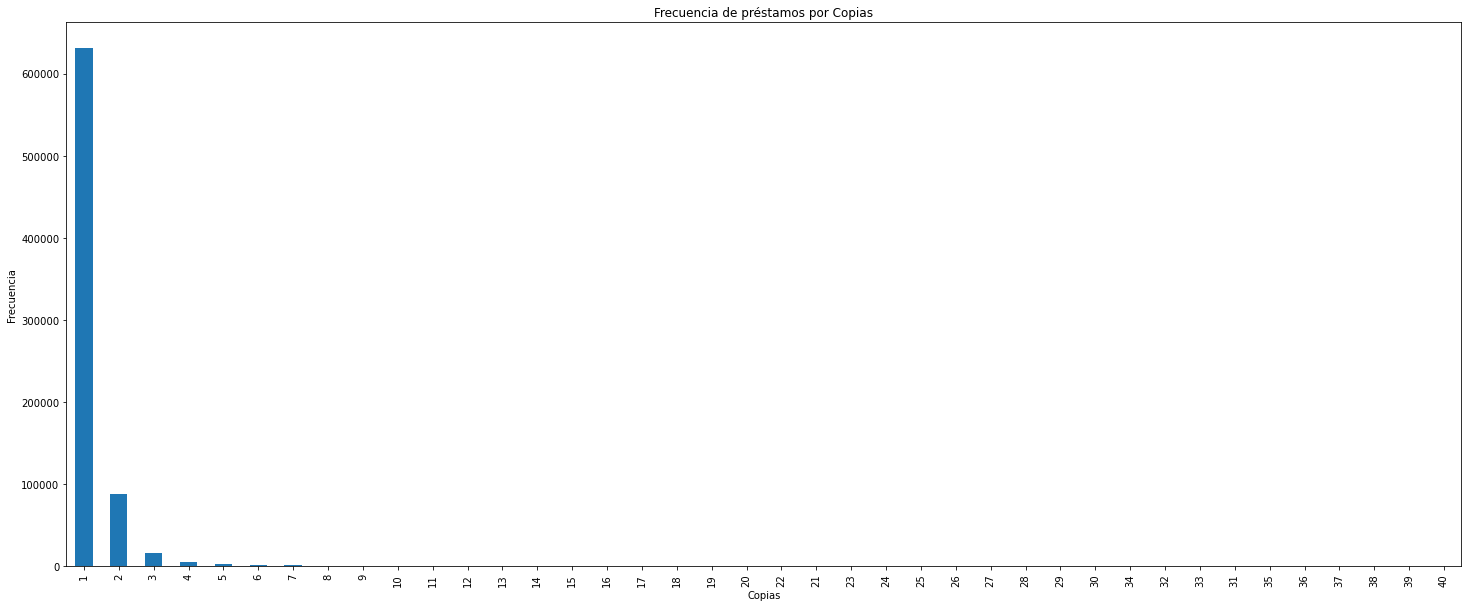

In [42]:
histograma(dataset,col)

In [43]:
frecuencias(dataset,col)


Copias,Procentaje (%)
1,84.473327
2,11.746285
3,2.207156
4,0.735406
5,0.306988
6,0.162799
7,0.094118
8,0.064397
9,0.040566
10,0.033336


**Análisis:** El número de copias que tiene algún ítem no es de importancia para el sistema de recomendación(dado que no tenemos acceso para saber si un libro está siendo presttado o no). Este número de copias tampoco nos señala cuantas veces hay un ítem, dado que esto se puede hacer mirando el número de libros que tienen un mismo dewey. 

### Col: Autor
**Descripción:** Autor(es) del libro.

In [44]:
##autor
dataset.loc[dataset["Autor"] == "-", "Autor"] = None

In [45]:
col = "Autor"
descripcion(dataset,col)

Número de datos nulos: 312348
Número de datos únicos: 203363
Tipo de dato: <class 'str'>
Ejemplo: Álvarez Ríos, Baldomero 1924-


In [46]:
print("Porcentaje de libros sin autor", len(dataset[dataset["Autor"].isnull()]) / len(dataset["Autor"])* 100, "%")

Porcentaje de libros sin autor 41.81734932403666 %


In [47]:
##Analizaremos cual el el autor que tiene mayor cantidad de prestamos
columna = 'Autor'
columnSize = dataset[columna].unique()
print("Numero de autores diferentes", len(columnSize))
#hay más de 200 mil autores diferentes en la biblioteca
#Vamos a buscar el número de libros si autor
sinAutor = dataset.loc[datasetMaterial[columna] == '-', columna].count()
print("Número de libros sin autor", sinAutor)
#Hay más de 300 mil libros de la biblioteca sin autor
#finalmente vamos a mirar los autores mas prestados
df = dataset[[columna,'Total de préstamos']]
agrupacion = df.groupby([columna])['Total de préstamos'].sum()
type(agrupacion)
table = (agrupacion.nlargest(20)).to_frame()
display(table)

Numero de autores diferentes 203363
Número de libros sin autor 0


,Total de préstamos
Autor,
"Tipler, Paul Allen 1933-",53244
"Mankiw, Nicholas Gregory",42371
"Foucault, Michel 1926-1984",24675
"Robbins, Stephen Paul 1943-",24618
"Thomas, George Brinton 1914-",20664
"Kolman, Bernard 1932-",18277
"Edwards, Charles Henry 1937-",17566
"Guyton, Arthur Clifton 1919-2003",17241
"Chiavenato, Idalberto 1929-",17047


**Analisis:** con más de 200.000 autores podemos notar la variedad de material que tiene la biblioteca. Notamos como 41.8% del material de la biblioteca no tiene un autor.

### Col: Autor corporativo
**Descripción:** autor corporativo del material. 

In [48]:
dataset.loc[dataset["Autor corporativo"] == "-", "Autor corporativo"] = None


In [49]:
dataset["Autor corporativo"][1]

'Academia de Ciencias Médicas, Físicas y Naturales de La Habana'

In [50]:
col = "Autor corporativo"
descripcion(dataset,col)

Número de datos nulos: 707112
Número de datos únicos: 7692
Tipo de dato: <class 'NoneType'>
Ejemplo: None


**Análisis:** La mayoría del material de la biblioteca no cuenta con un autor corporativo. 

### Col: Título
**Descripción:** Título del material

In [51]:
col = "Título"
dataset.loc[dataset[col] == "#¿NOMBRE?", col] = None
descripcion(dataset,col)

Número de datos nulos: 2
Número de datos únicos: 399701
Tipo de dato: <class 'str'>
Ejemplo: Copernico gigante del Renacimiento Baldomero Alvarez Ríos


**Análisis**: de manera parecida los títulos nos dejan ver la cantidad de material diferente que tiene la biblioteca. La mayoría del material tiene asociado un título lo cual ayuda que al realizar una recomendación el usuario sepa a primera vista por el título que se le está recomendando.

### Col: Tema 650
**Descripción:** Contiene un tema especifico para el ítem. Es más especifico que valores como el Dewey.

In [52]:
col = "Tema 650"
dataset.loc[dataset[col] == "-", col] = "Desconocido"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 105450
Tipo de dato: <class 'str'>
Ejemplo: Astrónomos Polonia Biografías


In [53]:
print("Número de datos desconocidos:", len(dataset.loc[dataset[col] == "Desconocido"]))


Número de datos desconocidos: 59984


**Análisis**: tema 650 incluye un tema especifico para cada libro. Por otro lado hay demasiados temas por lo cual realizar un trabajo de recomendación con este atributo puede llevar a problemas de dispersión. 

### Col: Año publicación
**Descripción:** año en el cual originalmente se publica o crea el ítem

In [54]:
dataset.loc[dataset["Año publicación"] == "-", "Año publicación"] = None


In [55]:
print("ítems con año 0:" , dataset.loc[dataset["Año publicación"] ==0].shape[0])
print("ítems con año mayor al actual:" , dataset.loc[dataset["Año publicación"] >2021].shape[0])


ítems con año 0: 32831
ítems con año mayor al actual: 112


In [56]:
col = "Año publicación"
descripcion(dataset,col)

Número de datos nulos: 70
Número de datos únicos: 371
Tipo de dato: <class 'numpy.float64'>
Ejemplo: 1973.0


In [57]:
dataset[col].describe()

count    746864.000000
mean       1895.774059
std         416.974491
min           0.000000
25%        1969.000000
50%        1991.000000
75%        2002.000000
max        9999.000000
Name: Año publicación, dtype: float64

**Análisis:** Notamos problemas de integridad de los datos para este atributo con más de 32000 ítems con año de publicación cero lo cual puede señalar que simplemente no se tiene información real sobre el año de publicación de dicho libro. Así mismo encontramos ítems con año de publicación mayor a la fecha actual lo cual también puede ser considerado como problemas de integridad de los datos.

**Análisis**

### Col: Todas las temáticas
**Descripción:** String que contiene diferentes tematicas que tiene el ítem. Más completo que categorías como Dewey más al mismo tiempo tiene problemas de integridad de datos al repetir ciertas palabras que están relacionadas a una misma categoría. 

In [58]:
col = "Todas las temáticas"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 266624
Tipo de dato: <class 'str'>
Ejemplo: 24$aAstronomos$zPolonia$vBiografias


In [59]:
len(dataset.loc[dataset[col].str.len()==0])


0

**Análisis:** Todas las temáticas es una columna parecida a Tema 650, con la diferencia de que los temas se encuentran en único String. Esta columna tiene diferentes separadores, por lo cual tampoco es sencillo de tokenizar. Esta columna será descartada.

# Limpieza

### Estandarización nombres columnas
Comenzaremos estandirando los nombres de las columnas, así como cambiando el nombre de las columnas sobre las cuales se va a realizar joins. Todos los nombres se pondrán en minuscula, sin tildes, ni espacios, pasando al estandar de camelCase.

In [60]:
dataset.columns

Index(['Signatura', 'Id de item', 'Ubicación Habitual', 'Ubicación Actual',
       'Tipo de ítem', 'Biblioteca', 'Cat2', 'Fecha de creación',
       'Total de préstamos', 'Llaves', 'Vol', 'Copias', 'Autor',
       'Autor corporativo', 'Título', 'Tema 650', 'Año publicación',
       'Todas las temáticas'],
      dtype='object')

In [61]:
nombresNuevos = {'Id de item':'IDItem',
 'Ubicación Habitual':'UbicacionHabitual',
  'Llaves':'Llave',
 'Ubicación Actual':'UbicacionActual',
  'Fecha de creación':'FechaCreación',
  'Numero de Ubicación':'NumeroUbicacion',
  'Total de préstamos':'TotalPrestamos',
  'Autor corporativo':'AutorCorporativo',
  'Tipo de ítem':'TipoItem',
  'Título':'Titulo',
 'Tema 650':'Tema650',
 'Todas las temáticas':'TodasTematicas',
 'Año publicación':'AnioPublicacion'}

In [62]:
materialLimpio = dataset.rename(columns=nombresNuevos)

In [63]:
materialLimpio.columns

Index(['Signatura', 'IDItem', 'UbicacionHabitual', 'UbicacionActual',
       'TipoItem', 'Biblioteca', 'Cat2', 'FechaCreación', 'TotalPrestamos',
       'Llave', 'Vol', 'Copias', 'Autor', 'AutorCorporativo', 'Titulo',
       'Tema650', 'AnioPublicacion', 'TodasTematicas'],
      dtype='object')

### Eliminacion Columnas
Se eliminarán las columnas que nos nos ofrecen información útil para los algoritmos de recomendación ni ofrecen información que pueda ser útil para los usuarios.

Las columnas a eliminar son:
* UbicacionHabitual: No ofrece valor adicional para los algoritmos de recomendación.
* Biblioteca: tiene único valor
* TodasTematicas: Es un atributo derivado y tiene problemas para tokenizar.
* AutorCorporativo:  No ofrece valor adicional para los algoritmos de recomendación ni para el usuario.
* Cat2: No ofrece valor adicional para los algoritmos de recomendación ni para el usuario.

In [64]:
materialLimpio = materialLimpio.drop(['UbicacionHabitual',
                                        'Biblioteca',
                                        'TodasTematicas',
                                        'AutorCorporativo',
                                        'Cat2',
                                      'Vol',
                                      'FechaCreación'],axis=1)

In [65]:
materialLimpio.columns

Index(['Signatura', 'IDItem', 'UbicacionActual', 'TipoItem', 'TotalPrestamos',
       'Llave', 'Copias', 'Autor', 'Titulo', 'Tema650', 'AnioPublicacion'],
      dtype='object')

### Eliminación Tipos de ítems
Para el contexto del material solo nos interesa recomendar cierto tipo de material bibliográfico. Como se pudo observar los prestamos están compuestos no solo de libros, sino también de video, grabaciones, mapas, entre otros.
A partir del análisis con expertos se decidió por centrarnos únicamente en estos tipos de materiales:
* 'LIBRO'
* 'LITERATURA'
* 'REFERENCIA'
* 'RESERVA'

In [66]:
materialLimpio = materialLimpio[materialLimpio['TipoItem'].isin([
'LIBRO',
'LITERATURA',
'REFERENCIA',
'RESERVA',
])]
materialLimpio.shape

(340698, 11)

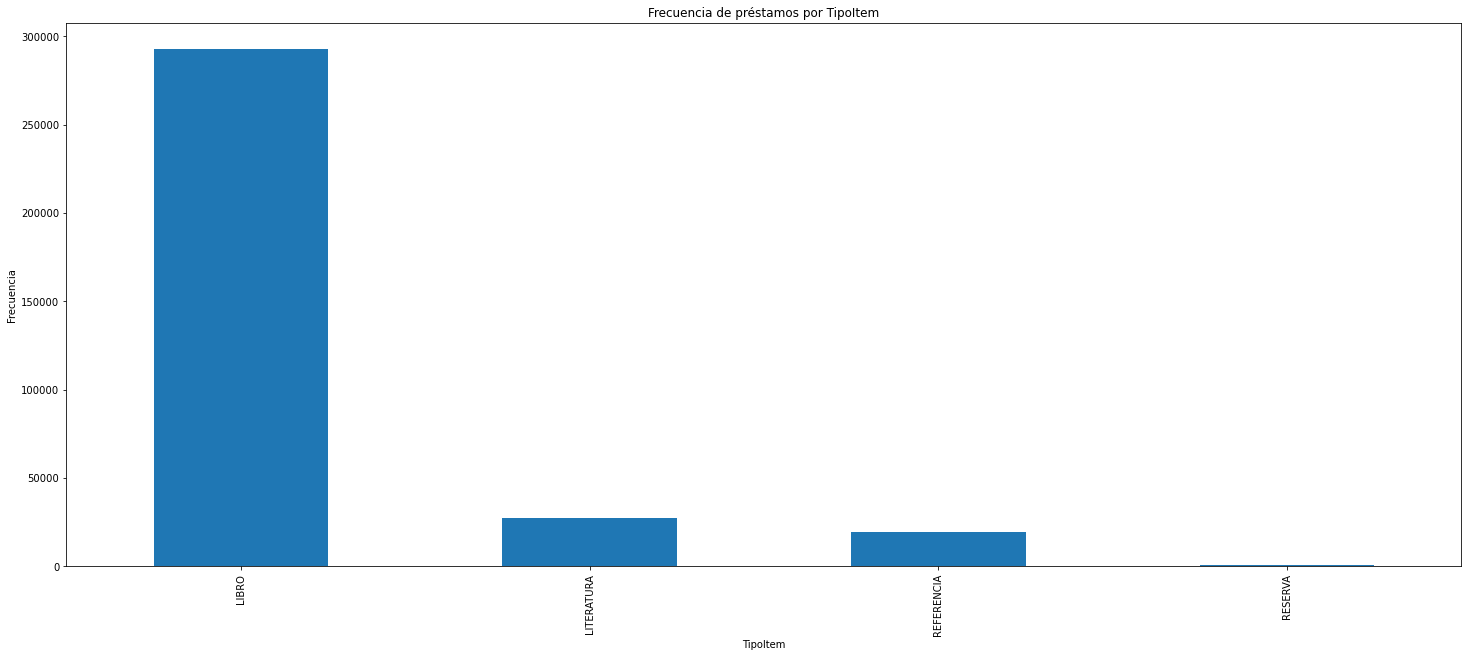

In [67]:
histograma(materialLimpio,'TipoItem')

## Atributo derivado(dewey)
A partir del sistema de dewey propio de la biblioteca y del atributo Signatura obtendremos que significa cada dewey. 

In [68]:
datasetDeweys = pd.read_excel('https://www.dropbox.com/scl/fi/87rzn3hw01a5weu45e12j/SistemaDewey.xlsx?dl=1&rlkey=8ey8kdgpyhdd6ktelmebmf6zj')

In [69]:
datasetDeweys.head()

,NO_DEWEY,EDICIÓN,ENCABEZAMIENTO,NOTA
0,001,21,Conocimiento y erudición,OK - REVISADO
1,001.1,21,Vida intelectual,OK - REVISADO
2,001.2,19,Aproximación interdisciplinaria al conocimiento,OK - REVISADO
3,001.2,19,Investigación interdisciplinaria,OK - REVISADO
4,001.3,21,Humanidades,OK - REVISADO


Dado que este archivo incluye los diferentes versionamientos de los deweys eliminamos duplicados y nos quedamos únicamente con el último dewey

In [70]:
datasetDeweys = datasetDeweys.drop_duplicates(subset=['NO_DEWEY'], keep='last')
datasetDeweys

,NO_DEWEY,EDICIÓN,ENCABEZAMIENTO,NOTA
1,001.1,21,Vida intelectual,OK - REVISADO
3,001.2,19,Investigación interdisciplinaria,OK - REVISADO
4,001.3,21,Humanidades,OK - REVISADO
5,001.4,21,Investigación,OK - REVISADO
9,001.42,21,Proyectos de investigación,OK - REVISADO
...,...,...,...,...
11115,V863,21,Novela venezolana,OK - REVISADO
11116,V863.08,21,Cuentos venezolanos|vColecciones,OK - REVISADO
11117,V863.09,21,Novela venezolana|xHistoria y crítica,OK - REVISADO
11118,V864,21,Ensayos venezolanos,OK - REVISADO


Extraemos el dewey de la columna Signatura.

In [71]:
materialLimpio["Signatura"] = materialLimpio["Signatura"].apply(lambda x: 
                       x.split())
materialLimpio["Signatura"] = materialLimpio["Signatura"].apply(lambda x: 
                       x[0])

Realizamos el join entre ambas tablas para poder entender de mejor manera cual es el dewey de cada ítem.

In [72]:
data_material = pd.DataFrame(data=materialLimpio)
data_deweys = pd.DataFrame(data=datasetDeweys)
materialLimpio2 = pd.merge(data_material, data_deweys,left_on='Signatura', right_on='NO_DEWEY', how='left')

In [73]:
materialLimpio2.head(3)

,Signatura,IDItem,UbicacionActual,TipoItem,TotalPrestamos,Llave,Copias,Autor,Titulo,Tema650,AnioPublicacion,NO_DEWEY,EDICIÓN,ENCABEZAMIENTO,NOTA
0,925.2,60000000049754,A-BATEMAN,LIBRO,0,933604,1,"Álvarez Ríos, Baldomero 1924-",Copernico gigante del Renacimiento Baldomero A...,Astrónomos Polonia Biografías,1973.0,925.2,21.0,"Galilei, Galileo|d1564-1642","Obras biográficas, para crítica astronómica y ..."
1,925.2,60000000049751,A-BATEMAN,LIBRO,0,933606,1,None,"Nicolás Copérnico, 500 aniversario, 1473-1973",Astronomía Historia,1973.0,925.2,21.0,"Galilei, Galileo|d1564-1642","Obras biográficas, para crítica astronómica y ..."
2,925.2,60000000049753,A-BATEMAN,LIBRO,0,933606,1,None,"Nicolás Copérnico, 500 aniversario, 1473-1973",Astronomía Historia,1973.0,925.2,21.0,"Galilei, Galileo|d1564-1642","Obras biográficas, para crítica astronómica y ..."


Finalmente eliminamos columnas que no nos interesan para el enfoque del proyecto. 

In [74]:
materialLimpio2 = materialLimpio2.drop(['NOTA','EDICIÓN'], axis = 1)


In [75]:
materialLimpio2

,Signatura,IDItem,UbicacionActual,TipoItem,TotalPrestamos,Llave,Copias,Autor,Titulo,Tema650,AnioPublicacion,NO_DEWEY,ENCABEZAMIENTO
0,925.2,60000000049754,A-BATEMAN,LIBRO,0,933604,1,"Álvarez Ríos, Baldomero 1924-",Copernico gigante del Renacimiento Baldomero A...,Astrónomos Polonia Biografías,1973.0,925.2,"Galilei, Galileo|d1564-1642"
1,925.2,60000000049751,A-BATEMAN,LIBRO,0,933606,1,None,"Nicolás Copérnico, 500 aniversario, 1473-1973",Astronomía Historia,1973.0,925.2,"Galilei, Galileo|d1564-1642"
2,925.2,60000000049753,A-BATEMAN,LIBRO,0,933606,1,None,"Nicolás Copérnico, 500 aniversario, 1473-1973",Astronomía Historia,1973.0,925.2,"Galilei, Galileo|d1564-1642"
3,925.2,60000000049765,A-BATEMAN,LIBRO,0,933606,2,None,"Nicolás Copérnico, 500 aniversario, 1473-1973",Astronomía Historia,1973.0,925.2,"Galilei, Galileo|d1564-1642"
4,925.2,60000000049752,A-BATEMAN,LIBRO,0,933606,1,None,"Nicolás Copérnico, 500 aniversario, 1473-1973",Astronomía Historia,1973.0,925.2,"Galilei, Galileo|d1564-1642"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340693,823,80000005587819,VALIOSOS,LIBRO,0,938650,1,"Wells, Herbert George 1866-1946",Doce historias y un sueño Herbert George Wells...,Cuentos ingleses,1950.0,823,Novela tanzana (Inglés)
340694,894.5111,80000005590994,VALIOSOS,LIBRO,0,940346,1,"Glatz, Jakob 1776-1831",Una familia africana ó La esclava convertida ;...,Literatura húngara,1886.0,894.5111,Poesía húngara
340695,843,80000005591002,VALIOSOS,LIBRO,0,940351,1,"Gaboriau, Emile 1832-1873","El hijo falso segunda parte de ""El legajo núm....",Novela francesa,1900.0,843,Prosa francesa
340696,946.02,80000005591001,VALIOSOS,LIBRO,0,940352,1,"Conde, José Antonio 1765-1820",Historia de la dominación de los árabes en Esp...,Árabes en España,1874.0,946.02,"España|xHistoria|yDominación árabe, 711-1492"


In [76]:
descripcion(materialLimpio2,'ENCABEZAMIENTO')

Número de datos nulos: 95587
Número de datos únicos: 6597
Tipo de dato: <class 'str'>
Ejemplo: Galilei, Galileo|d1564-1642


In [77]:
descripcion(materialLimpio2,'Signatura')

Número de datos nulos: 0
Número de datos únicos: 20541
Tipo de dato: <class 'str'>
Ejemplo: 925.2


In [78]:
descripcion(materialLimpio2,'NO_DEWEY')

Número de datos nulos: 95587
Número de datos únicos: 6829
Tipo de dato: <class 'str'>
Ejemplo: 925.2


Antes de finalizar modificamos la columna Signatura nuevamente. Crearemos una expresión regular que identifique los 3 primeros números. En caso de que no haya 3 número en el String se dejará el valor original. 

In [79]:
def estandarizarDeweys(signatura): 
  match = re.search(r'\d{3}', signatura)
  if match:
    return match.group(0)
  else: 
    return signatura


In [80]:
materialLimpio2["Signatura"] = materialLimpio2["Signatura"].apply(lambda signatura: estandarizarDeweys(signatura))

**Análisis:** aunque cada ítem tiene Signatura, y cada signatura tiene un dewey, notamos que no todo está mapeado de manera correcta con el documento de deweys de la biblioteca general. 

## Atributo derivado(Tema)
A partir del tema 650 crearemos una nueva columna llamada tema, esta se obtendra a partir de la tokenización y estandarización del string de la columna. 

También quitaremos stopwords, esto lo realizamos en busca de que el atributo principal para los algoritmo de predicción sea esta nueva columna.

In [81]:
len(materialLimpio2['Tema650'].unique())

68148

Pasamos primero todos los textos a minúscula.

In [82]:
materialLimpio2['Tema650'] = materialLimpio2['Tema650'].apply(lambda x: x.lower())

In [83]:
len(materialLimpio2['Tema650'].unique())

66330

In [84]:
import unicodedata
def strip_accents(s):
   # Retorna el string normalizado si la categoría es Mn es decir https://www.compart.com/en/unicode/category/Mn
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

In [85]:
 materialLimpio2['Tema650'] = materialLimpio2['Tema650'].apply(lambda x: strip_accents(x))

In [86]:
len(materialLimpio2['Tema650'].unique())

64783

In [87]:
tema650 = materialLimpio2['Tema650'].unique()
tema650

array(['astronomos polonia biografias', 'astronomia historia',
       'ciencia y civilizacion', ..., 'testamentos manuscritos colombia',
       'poesia colombiana historia critica siglo xx',
       'girondinos historia'], dtype=object)

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem.snowball import *
stemmer = SnowballStemmer('spanish')
nltk.download('punkt')
nltk.download('stopwords')
stop_words_sp = set(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [89]:
temas = pd.DataFrame(tema650,
                   columns=['original'])

Eliminamos stopwords y aplicamos el tokenizador.

In [90]:
def preprocesamiento(words):
    word_tokens = word_tokenize(words)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words_sp]
    words=[word.lower() for word in filtered_sentence if word.isalpha()]
    return words

In [91]:
temas["tokenizado"] = temas["original"].apply(lambda x: preprocesamiento(x))

In [92]:
temas.head(3)

,original,tokenizado
0,astronomos polonia biografias,"[astronomos, polonia, biografias]"
1,astronomia historia,"[astronomia, historia]"
2,ciencia y civilizacion,"[ciencia, civilizacion]"


In [93]:
def stemmizar(words):
  result = []
  for word in words:
    result.append(stemmer.stem(word))
  return result

In [94]:
temas["stemizado"] = temas["tokenizado"].apply(lambda x: stemmizar(x))

In [95]:
temas.head(3)

,original,tokenizado,stemizado
0,astronomos polonia biografias,"[astronomos, polonia, biografias]","[astronom, poloni, biografi]"
1,astronomia historia,"[astronomia, historia]","[astronomi, histori]"
2,ciencia y civilizacion,"[ciencia, civilizacion]","[cienci, civilizacion]"


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [97]:
def union(s):
  x=' '.join(c for c in s)
  return x

In [98]:
temas['union'] = temas["stemizado"].apply(lambda x: union(x))

In [99]:
vectorizador1 = CountVectorizer(analyzer = "word")
matrizCountVectorizer1 = vectorizador1.fit_transform(temas['union'])
matrizCountVectorizer1

<64783x9460 sparse matrix of type '<class 'numpy.int64'>'
	with 207412 stored elements in Compressed Sparse Row format>

Finalmente realizamos el join para poner a cada libro su listado de temas. 

In [100]:
ds_items = pd.DataFrame(data=materialLimpio2)
ds_temas = pd.DataFrame(data=temas)
materialLimpio3 = pd.merge(ds_items, ds_temas, left_on='Tema650', right_on='original', how='left')
materialLimpio3 = materialLimpio3.drop(['tokenizado'], axis = 1)

In [101]:
materialLimpio3.head(3)

,Signatura,IDItem,UbicacionActual,TipoItem,TotalPrestamos,Llave,Copias,Autor,Titulo,Tema650,AnioPublicacion,NO_DEWEY,ENCABEZAMIENTO,original,stemizado,union
0,925,60000000049754,A-BATEMAN,LIBRO,0,933604,1,"Álvarez Ríos, Baldomero 1924-",Copernico gigante del Renacimiento Baldomero A...,astronomos polonia biografias,1973.0,925.2,"Galilei, Galileo|d1564-1642",astronomos polonia biografias,"[astronom, poloni, biografi]",astronom poloni biografi
1,925,60000000049751,A-BATEMAN,LIBRO,0,933606,1,None,"Nicolás Copérnico, 500 aniversario, 1473-1973",astronomia historia,1973.0,925.2,"Galilei, Galileo|d1564-1642",astronomia historia,"[astronomi, histori]",astronomi histori
2,925,60000000049753,A-BATEMAN,LIBRO,0,933606,1,None,"Nicolás Copérnico, 500 aniversario, 1473-1973",astronomia historia,1973.0,925.2,"Galilei, Galileo|d1564-1642",astronomia historia,"[astronomi, histori]",astronomi histori


In [102]:
materialLimpio3 = materialLimpio3.rename(columns={'stemizado':'Temas', 'ENCABEZAMIENTO':'TemaDewey', 'NO_DEWEY':'Dewey','original':'Original','union':'Union'})

Al finalizar el proceso de procesamiento de lenguaje natural encontramos 9460 palabras o temas para nuestros libros. 

## Estandandarización año publicación
Finalmente, modificaremos los registros que tienen como año de publicación, una fecha mayor al año actual. Todos estos registros se podrán como año 0 al igual que el resto de registros sobre los cuales no se tiene información acerca de la fecha. 

In [103]:
descripcion(materialLimpio3,"AnioPublicacion")

Número de datos nulos: 11
Número de datos únicos: 366
Tipo de dato: <class 'numpy.float64'>
Ejemplo: 1973.0


In [104]:
materialLimpio3.loc[materialLimpio3["AnioPublicacion"] >2021,"AnioPublicacion"] = 0

In [105]:
materialLimpio3["AnioPublicacion"].describe()

count    340687.000000
mean       1940.643001
std         290.580538
min           0.000000
25%        1970.000000
50%        1989.000000
75%        2003.000000
max        2021.000000
Name: AnioPublicacion, dtype: float64

In [106]:
materialLimpio3.columns

Index(['Signatura', 'IDItem', 'UbicacionActual', 'TipoItem', 'TotalPrestamos',
       'Llave', 'Copias', 'Autor', 'Titulo', 'Tema650', 'AnioPublicacion',
       'Dewey', 'TemaDewey', 'Original', 'Temas', 'Union'],
      dtype='object')

# Conclusiones y decisiones
A nivel de la estrucuturación y problemas de integridad del dataset se tomaron las siguientes decisiones:
* Eliminar tipo de items no asociados a libros.
* Formatear columna Fecha de creación a un TimeStamp
* Formatear el nombre de las columnas para seguir un mismo formato
* Estandrizar la columna de Facultad
* Eliminar columnas UbicacionHabitual','Biblioteca','TodasTematicas', 'AutorCorporativo','Cat2', 'Vol','FechaCreación'.
* Crear la columna derivada Temas.
* Crear la columna derivada Encabezamiento.
* Limpieza del atributo año de lanzamiento.  

El dataset de manera general no contenía problemas de integridad, nulos o datos faltantes lo cual ayudó en gran manera a que el proceso de limpieza fuera lo más sencillo posible. 

#Exportación

In [107]:
materialLimpio3.to_json(r'C:\Users\johan\Desktop\GitKraken\DataOutOfGit\Limpieza\B-GENERAL-COLECCIONES-TEMATICAS.json')